In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from pydrake.all import RigidTransform, RollPitchYaw, RotationMatrix
import logging

In [3]:
from typing import NamedTuple
import sponana.perception.bayes3d.bayes3d_interface as b3d
import jax.numpy as jnp

class CameraImage(NamedTuple):
    camera_pose: RigidTransform
    intrinsics: np.ndarray # 3 x 3
    color_image: np.ndarray # W x H x 3
    depth_image: np.ndarray # W x H

def external_pose_to_b3d_pose(x):
    return jnp.array(x.GetAsMatrix4())
def b3d_pose_to_external_pose(x):
    return RigidTransform(x)

Camera poses in table frame:
[RigidTransform(
  R=RotationMatrix([
    [-0.008426572055398018, 0.49998224790571183, -0.865994656255191],
    [0.9999644958114239, 0.004213286027699008, -0.007297625466794737],
    [0.0, -0.8660254037844386, -0.49999999999999983],
  ]),
  p=[0.5567144688632728, -0.003735510093671053, 0.29574999999999996],
), RigidTransform(
  R=RotationMatrix([
    [0.7564493864543211, -0.32702611735642795, 0.5664258506633156],
    [-0.6540522347128561, -0.3782246932271605, 0.6551043853465944],
    [0.0, -0.8660254037844387, -0.4999999999999999],
  ]),
  p=[-0.4067672805262673, -0.5122634135249003, 0.29574999999999996],
), RigidTransform(
  R=RotationMatrix([
    [-0.8214529060279898, -0.28513817842327355, 0.49387381220674975],
    [-0.5702763568465472, 0.4107264530139948, -0.7113990846327904],
    [0.0, -0.8660254037844387, -0.4999999999999999],
  ]),
  p=[-0.35091572089593653, 0.4881919030929625, 0.29574999999999996],
)]
Camera poses in world frame:
[RigidTransform(
  R

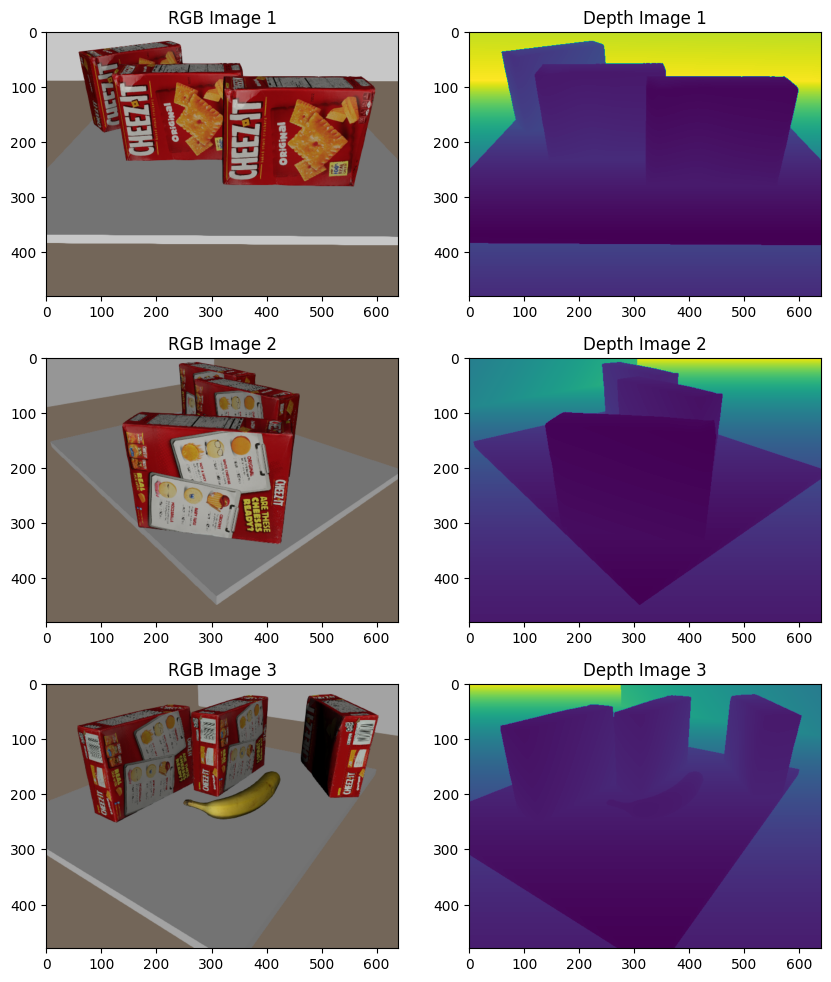

In [4]:
import matplotlib.pyplot as plt
import pickle

# Test loading in camera poses and images:
with open("../images2.pkl", "rb") as f:
    rgb_imgs = pickle.load(f)
    depth_imgs = pickle.load(f)
    camera_poses_table_frame = pickle.load(f)
    camera_poses_world_frame = pickle.load(f)
    table_pose_world_frame = pickle.load(f)
    camera_infos = pickle.load(f)

# Print poses and visualize images in same grid as above:
print("Camera poses in table frame:")
print(camera_poses_table_frame)
print("Camera poses in world frame:")
print(camera_poses_world_frame)
print("Table pose in world frame:")
print(table_pose_world_frame)
print("Camera infos:")
print(camera_infos)
fig, axs = plt.subplots(3, 2, figsize=(10, 12))
for camera_idx in range(3):
    axs[camera_idx, 0].imshow(rgb_imgs[camera_idx])
    axs[camera_idx, 0].set_title(f"RGB Image {camera_idx+1}")
    axs[camera_idx, 1].imshow(depth_imgs[camera_idx])
    axs[camera_idx, 1].set_title(f"Depth Image {camera_idx+1}")

## Belief init

In [5]:
logging.root.setLevel(logging.DEBUG)

idx = 0
camera_image = CameraImage(
    camera_poses_world_frame[idx],
    camera_infos[idx].intrinsic_matrix(),
    rgb_imgs[idx][:, :, :3],
    depth_imgs[idx][:, :, 0],
)

(known_poses, possible_poses) = b3d.b3d_init(
    camera_image,
    ['cracker_box', 'banana'], # categories in scene
    'banana', # target
    4, # number objects on table
    (table_pose_world_frame, 0.49, 0.63, 0.015),
    scaling_factor=0.2,
    external_pose_to_b3d_pose=external_pose_to_b3d_pose,
    b3d_pose_to_external_pose=b3d_pose_to_external_pose,
)

PRE PROJ MATRIX
POST PROJ MATRIX
WIDTH = 128.  HEIGHT = 96
>>Mode = automatic
>>pre device
>>device is none
>>device win
>>1
>>2
>>3
>>4
>>5
>>6
>>6.5
>>6.75
>>7
>>got plugin
>>got cpp wrapper
Got Renderer Env
>>1
>>1
Increasing frame buffer size to (width, height, depth) = (128, 96, 1024)


[E rasterize_gl.cpp:121] OpenGL version reported as 4.6


Ran build_setup_primitive
>>1
>>1
>>1
>>1
>>1
>>1
>>1
>>1
>>1
>>1
>>1
>>1
>>1
>>1
>>1
>>1
>>1
>>1
>>1
>>1
>>1
>>1
Centering mesh with translation [0.   0.   0.09]
>>1
You can open the visualizer by visiting the following URL:
http://127.0.0.1:7000/static/
Fitting object 0...
>>1
>>1
>>1
Fitting object 1...
Fitting object 2...
Fitting object 3...
>>1
>>1
>>1


INFO:root:Score with target object: 19.376628875732422
DEBUG:jax._src.dispatch:Finished tracing + transforming fn for pjit in 0.0007107257843017578 sec
DEBUG:jax._src.interpreters.pxla:Compiling fn for with global shapes and types [ShapedArray(float32[]), ShapedArray(float32[], weak_type=True)]. Argument mapping: (GSPMDSharding({replicated}), GSPMDSharding({replicated})).
DEBUG:jax._src.dispatch:Finished jaxpr to MLIR module conversion jit(fn) in 0.002289295196533203 sec
DEBUG:jax._src.compiler:get_compile_options: num_replicas=1 num_partitions=1 device_assignment=[[cuda(id=0)]]
DEBUG:jax._src.compiler:get_compile_options XLA-AutoFDO profile: using XLA-AutoFDO profile version -1
DEBUG:jax._src.dispatch:Finished XLA compilation of jit(fn) in 0.01869511604309082 sec
DEBUG:jax._src.dispatch:Finished tracing + transforming jit(convert_element_type) in 0.00032210350036621094 sec
DEBUG:jax._src.interpreters.pxla:Compiling convert_element_type for with global shapes and types [ShapedArray(int

>>1


DEBUG:jax._src.dispatch:Finished XLA compilation of jit(fn) in 0.0636897087097168 sec
DEBUG:jax._src.interpreters.pxla:Compiling fn for with global shapes and types [ShapedArray(float32[1,96,128]), ShapedArray(bool[1,96,128])]. Argument mapping: (GSPMDSharding({replicated}), GSPMDSharding({replicated})).
DEBUG:jax._src.dispatch:Finished jaxpr to MLIR module conversion jit(fn) in 0.0023851394653320312 sec
DEBUG:jax._src.compiler:get_compile_options: num_replicas=1 num_partitions=1 device_assignment=[[cuda(id=0)]]
DEBUG:jax._src.compiler:get_compile_options XLA-AutoFDO profile: using XLA-AutoFDO profile version -1
DEBUG:jax._src.dispatch:Finished XLA compilation of jit(fn) in 0.06484150886535645 sec
DEBUG:jax._src.interpreters.pxla:Compiling <lambda> for with global shapes and types [ShapedArray(float32[], weak_type=True), ShapedArray(bool[1,96,128])]. Argument mapping: (GSPMDSharding({replicated}), GSPMDSharding({replicated})).
DEBUG:jax._src.dispatch:Finished jaxpr to MLIR module conve

>>1


DEBUG:jax._src.dispatch:Finished XLA compilation of jit(squeeze) in 0.013134002685546875 sec
DEBUG:jax._src.interpreters.pxla:Compiling fn for with global shapes and types [ShapedArray(float32[3200,96,128]), ShapedArray(float32[], weak_type=True)]. Argument mapping: (GSPMDSharding({replicated}), GSPMDSharding({replicated})).
DEBUG:jax._src.dispatch:Finished jaxpr to MLIR module conversion jit(fn) in 0.002490520477294922 sec
DEBUG:jax._src.compiler:get_compile_options: num_replicas=1 num_partitions=1 device_assignment=[[cuda(id=0)]]
DEBUG:jax._src.compiler:get_compile_options XLA-AutoFDO profile: using XLA-AutoFDO profile version -1
DEBUG:jax._src.dispatch:Finished XLA compilation of jit(fn) in 0.06706523895263672 sec
DEBUG:jax._src.interpreters.pxla:Compiling fn for with global shapes and types [ShapedArray(float32[3200,96,128]), ShapedArray(float32[], weak_type=True)]. Argument mapping: (GSPMDSharding({replicated}), GSPMDSharding({replicated})).
DEBUG:jax._src.dispatch:Finished jaxpr 

: 

## Consider probable effects of different looking positions

### pose 1

In [16]:
is_visible = b3d.b3d_is_visible(
    known_poses, possible_poses, camera_poses_world_frame[1],
    'banana',
    external_pose_to_b3d_pose=external_pose_to_b3d_pose,
    b3d_pose_to_external_pose=b3d_pose_to_external_pose,
)

count_visible = jnp.count_nonzero(is_visible)
count_invisible = jnp.count_nonzero(~is_visible)
print(f"Visible count: {count_visible}, Invisible count: {count_invisible}")
print(f"Visible fraction: {count_visible / (count_visible + count_invisible)}")

Visible count: 551, Invisible count: 264
Visible fraction: 0.6760736107826233


### Pose 2

In [17]:
is_visible = b3d.b3d_is_visible(
    known_poses, possible_poses, camera_poses_world_frame[2],
    'banana',
    external_pose_to_b3d_pose=external_pose_to_b3d_pose,
    b3d_pose_to_external_pose=b3d_pose_to_external_pose,
)

count_visible = jnp.count_nonzero(is_visible)
count_invisible = jnp.count_nonzero(~is_visible)
print(f"Visible count: {count_visible}, Invisible count: {count_invisible}")
print(f"Visible fraction: {count_visible / (count_visible + count_invisible)}")

Visible count: 811, Invisible count: 4
Visible fraction: 0.9950920343399048


## Belief update

### pose 1

In [21]:
idx2 = 1
camera_image2 = CameraImage(
    camera_pose=camera_poses_world_frame[idx2],
    intrinsics=camera_infos[idx2].intrinsic_matrix(),
    color_image=rgb_imgs[idx2][:, :, :3],
    depth_image=depth_imgs[idx2][:, :, 0],
)

In [22]:
(updated_known, updated_possible) = b3d.b3d_update(
    known_poses, possible_poses, camera_image2, table_pose_world_frame, 'banana',
    external_pose_to_b3d_pose=external_pose_to_b3d_pose,
    b3d_pose_to_external_pose=b3d_pose_to_external_pose,
    scaling_factor=0.2
)

[E rasterize_gl.cpp:121] OpenGL version reported as 4.6


Increasing frame buffer size to (width, height, depth) = (128, 96, 1024)
Centering mesh with translation [0.   0.   0.09]
Target object is not visible.
Score without any rendered objects: 15.799967765808105
Max score with target object: 15.887451171875


In [20]:
len(possible_poses) - len(updated_possible)

814

### update pose 1 belief via pose 2 belief

In [11]:
idx3 = 2
camera_image3 = CameraImage(
    camera_pose=camera_poses_world_frame[idx3],
    intrinsics=camera_infos[idx3].intrinsic_matrix(),
    color_image=rgb_imgs[idx3][:, :, :3],
    depth_image=depth_imgs[idx3][:, :, 0],
)

(updated_known2, updated_possible2) = b3d.b3d_update(
    updated_known, updated_possible, camera_image3, table_pose_world_frame, 'banana',
    external_pose_to_b3d_pose=external_pose_to_b3d_pose,
    b3d_pose_to_external_pose=b3d_pose_to_external_pose,
    scaling_factor=0.2
)

[E rasterize_gl.cpp:121] OpenGL version reported as 4.6


Increasing frame buffer size to (width, height, depth) = (128, 96, 1024)
Centering mesh with translation [0.   0.   0.09]
Target object is visible.
Score without any rendered objects: 16.5771484375
Max score with target object: 16.815185546875
